In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [75]:
dataset= pd.read_csv('Mall_Customers.csv')

In [76]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [77]:
dataset.shape

(200, 5)

In [78]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [79]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [80]:
dataset=dataset.drop(['CustomerID'],axis=1)

In [81]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [82]:
dataset.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [83]:
dataset.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [84]:
dataset['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

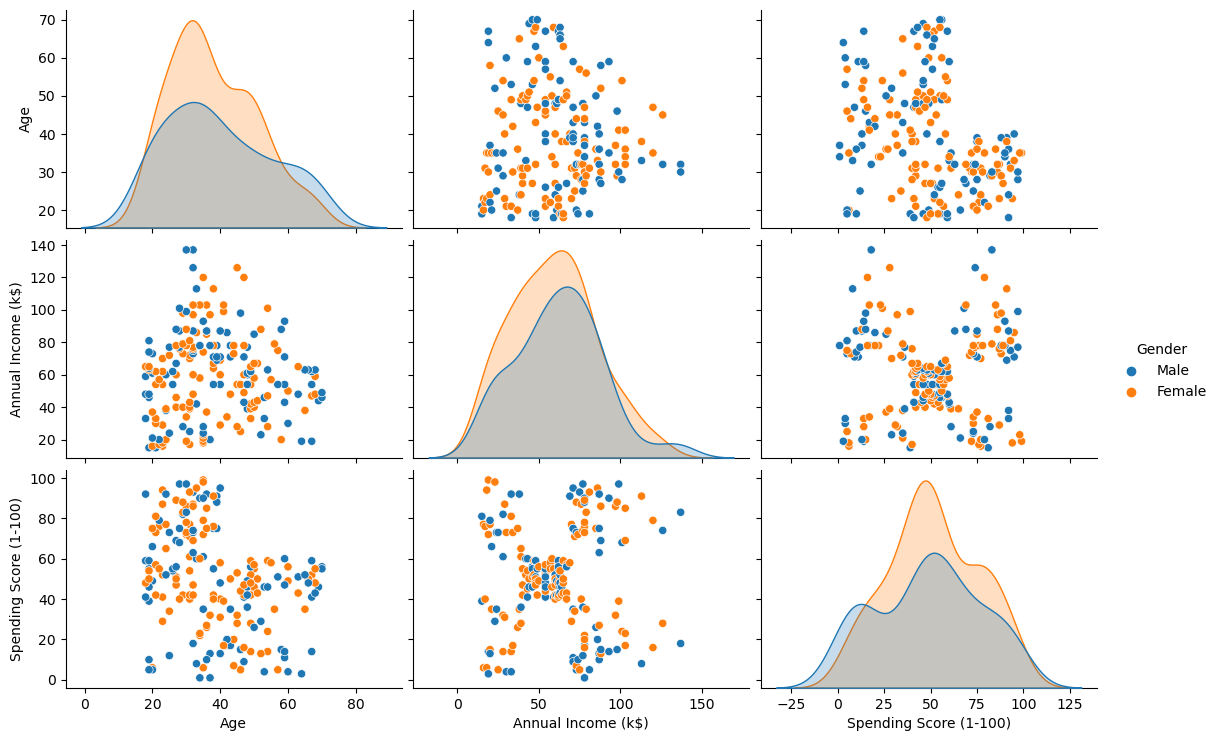

In [85]:
sns.pairplot(dataset, hue='Gender', aspect=1.5)
plt.show()

In [86]:
dataset=dataset.drop(['Gender'],axis=1)
dataset.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [87]:
dataset.rename(columns = {'Annual Income (k$)':'Income'}, inplace = True)
dataset.rename(columns = {'Spending Score (1-100)':'Score'}, inplace = True)
dataset.columns

Index(['Age', 'Income', 'Score'], dtype='object')

C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

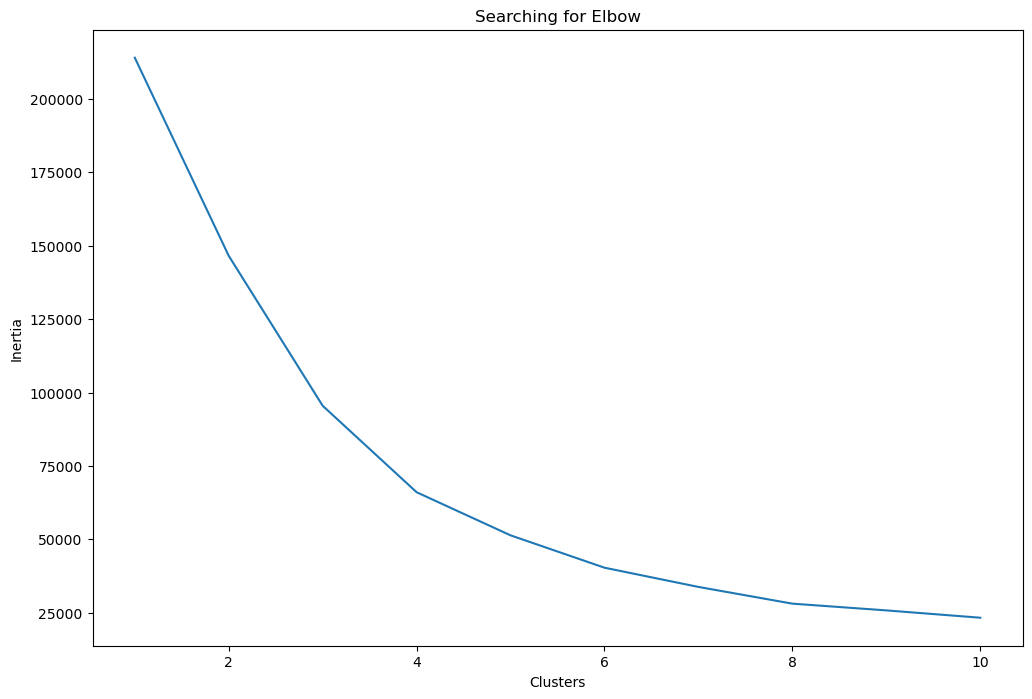

In [88]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i,n_init=10).fit(X_train)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


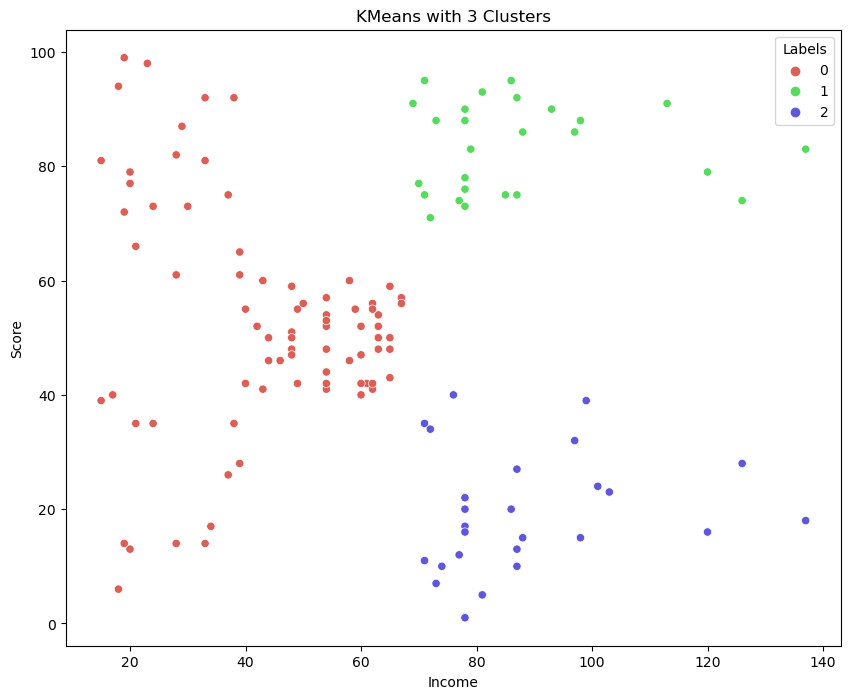

In [89]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(X_train)

X_train['Labels'] = km3.labels_
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train['Income'], y=X_train['Score'] ,hue=X_train['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


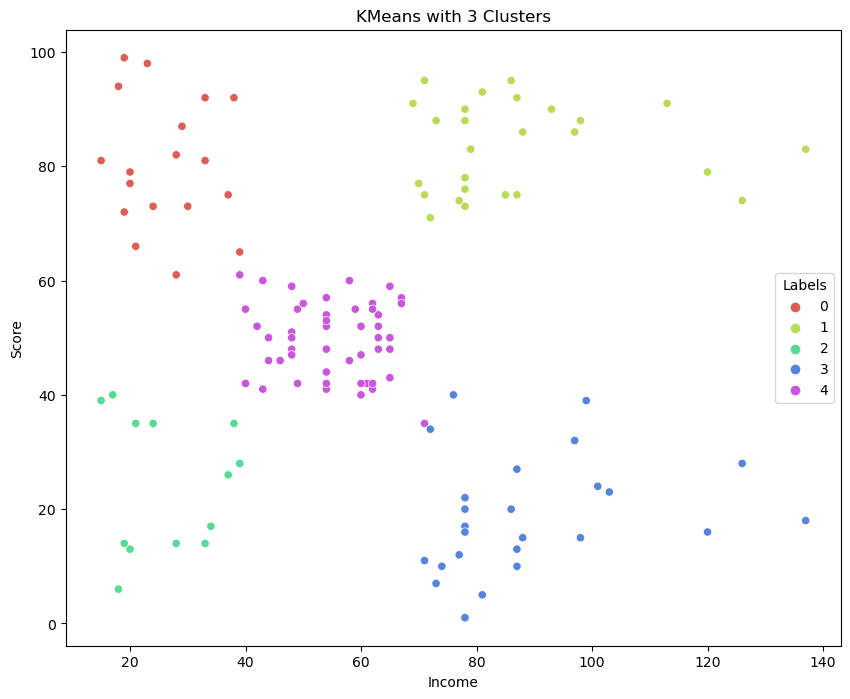

In [90]:
# 5 cluster
km3 = KMeans(n_clusters=5).fit(X_train)

X_train['Labels'] = km3.labels_
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train['Income'], y=X_train['Score'] ,hue=X_train['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 3 Clusters')
plt.show()

We can analyze our 5 clusters in detail now:

Label 0 is low income and low spending,
Label 1 is high income and high spending,
Label 2 is mid income and mid spending,
Label 3 is high income and low spending,
Label 4 is low income and high spending

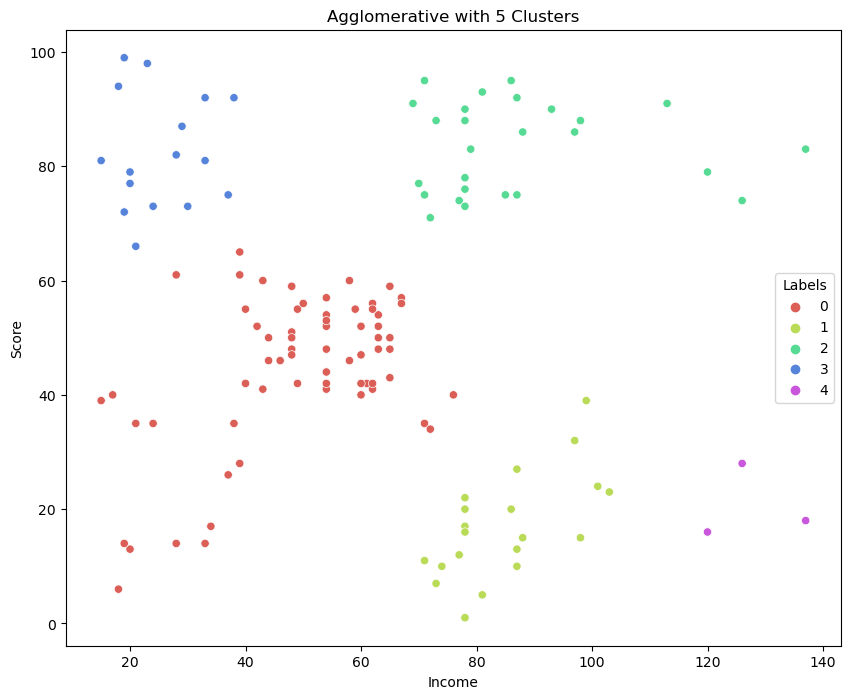

In [91]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X_train)

X_train['Labels'] = agglom.labels_
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train['Income'], y=X_train['Score'], hue=X_train['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

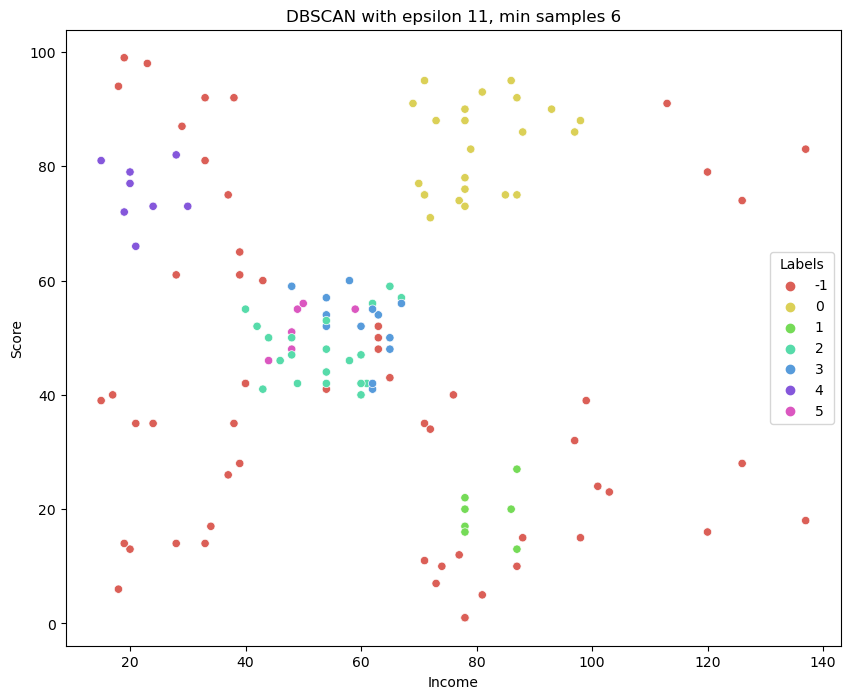

In [92]:
from sklearn.cluster import DBSCAN 
import numpy as np
db = DBSCAN(eps=11, min_samples=6).fit(X_train)

X_train['Labels'] = db.labels_
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train['Income'], y=X_train['Score'], hue=X_train['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


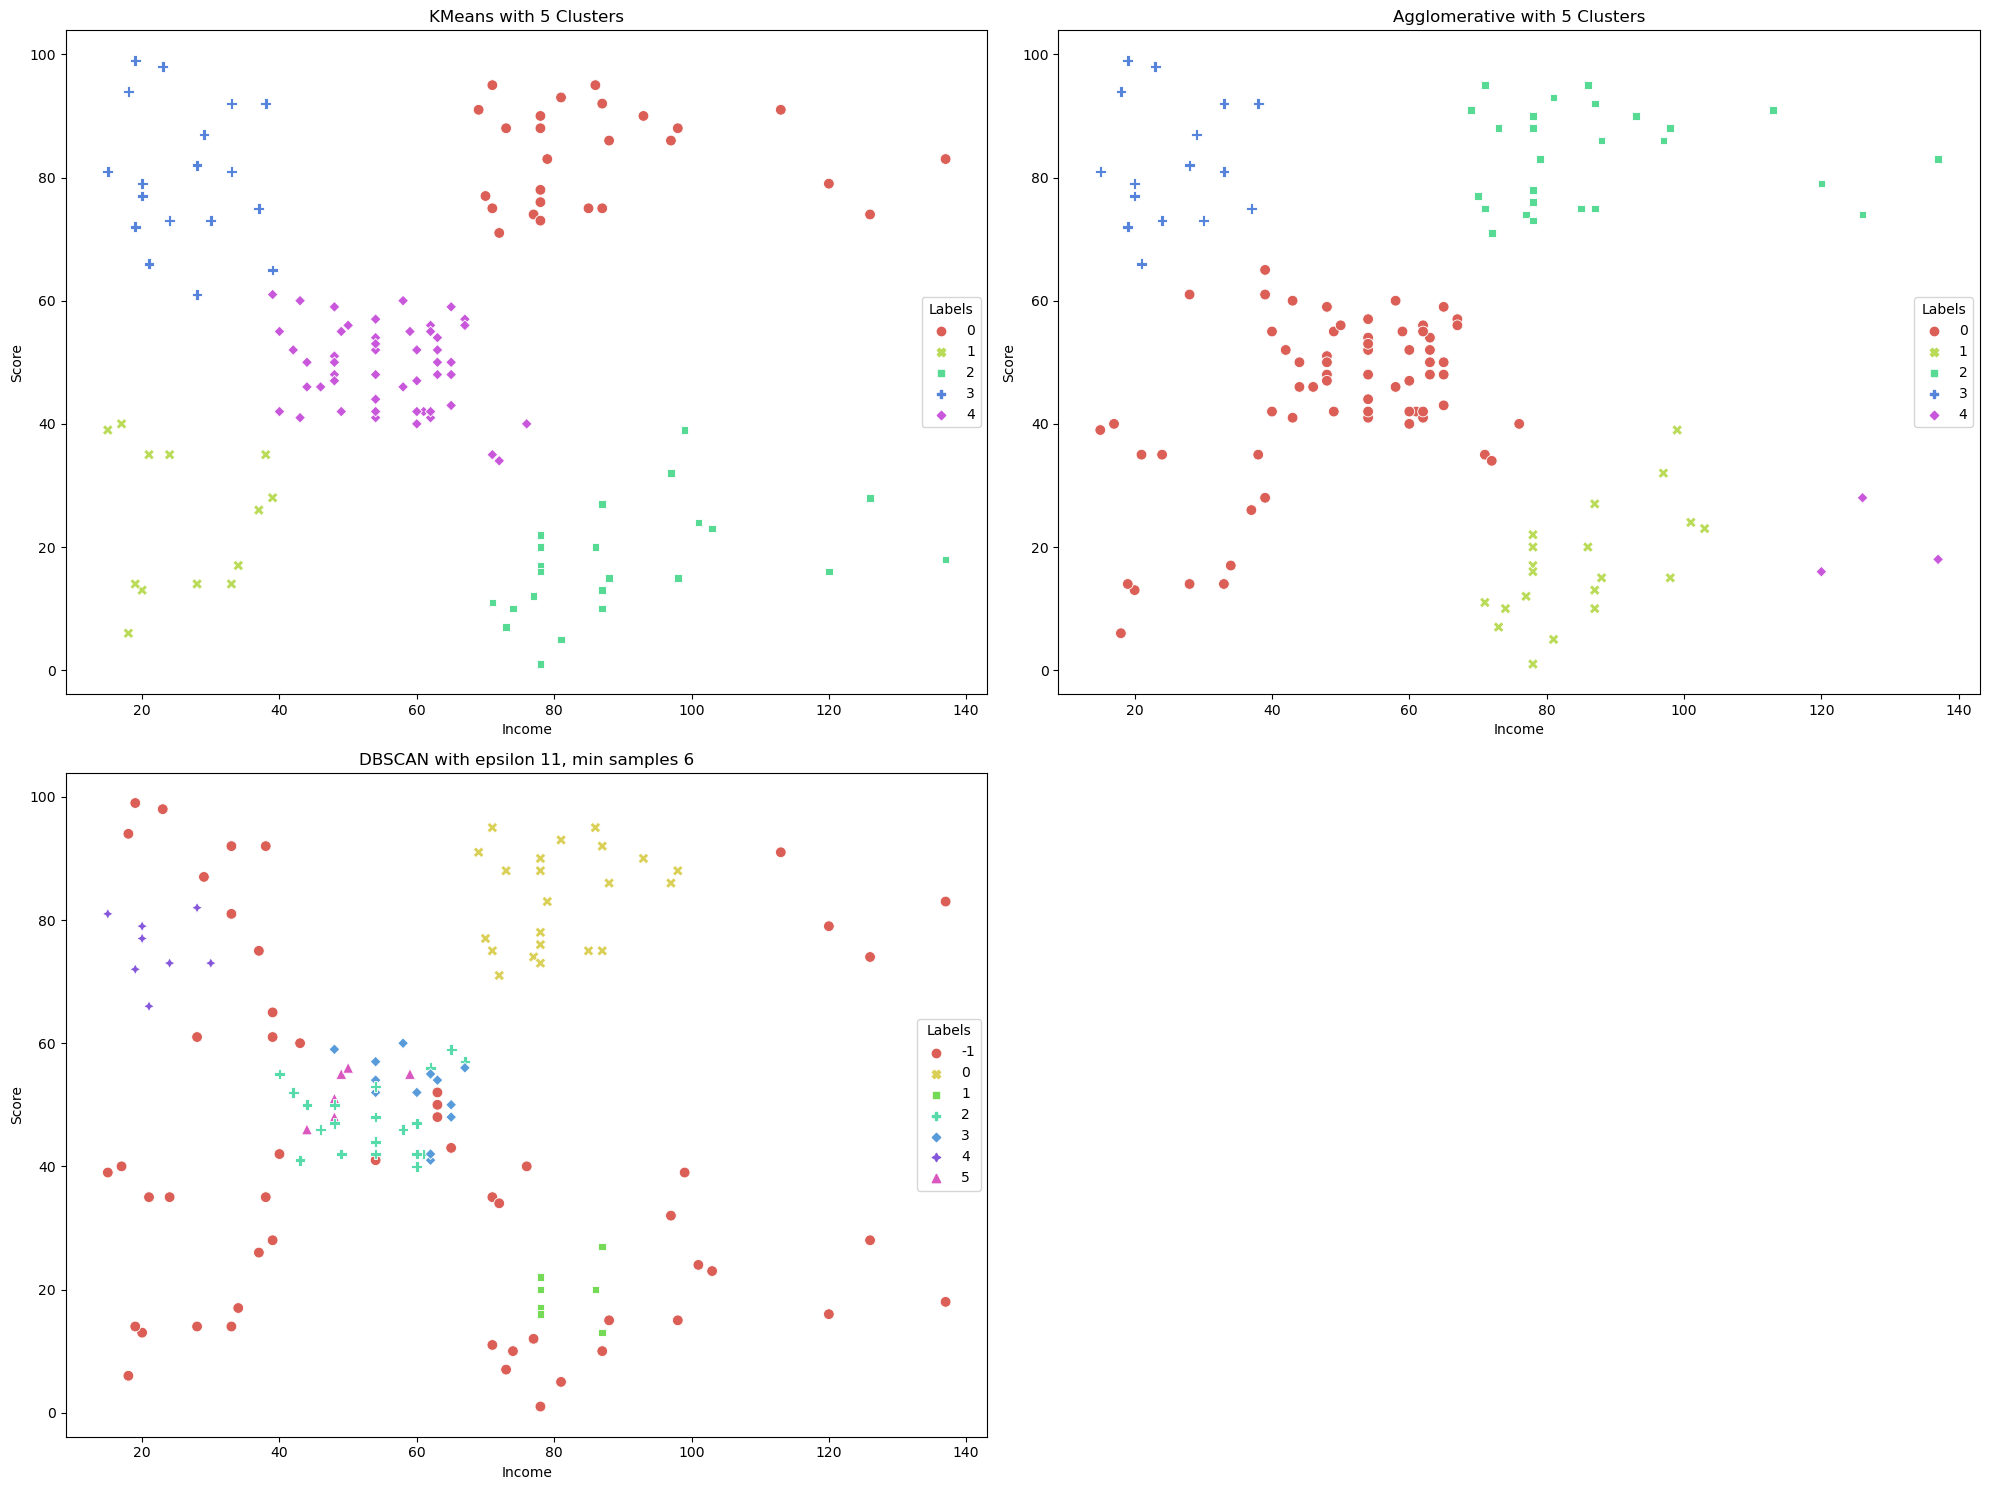

In [93]:
fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=5).fit(X_train)
X_train['Labels'] = km5.labels_
sns.scatterplot(x=X_train['Income'], y=X_train['Score'], hue=X_train['Labels'], style=X_train['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('KMeans with 5 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X_train)
X_train['Labels'] = agglom.labels_
sns.scatterplot(x=X_train['Income'], y=X_train['Score'], hue=X_train['Labels'], style=X_train['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('Agglomerative with 5 Clusters')


##### DBSCAN #####
ax = fig.add_subplot(223)

db = DBSCAN(eps=11, min_samples=6).fit(X_train)
X_train['Labels'] = db.labels_
sns.scatterplot(x=X_train['Income'], y=X_train['Score'], hue=X_train['Labels'], style=X_train['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN with epsilon 11, min samples 6')




plt.tight_layout()
plt.show()